280464.20508762385 361237.00287336553
261755.6329467115 277580.2852601698 316237.72290084057 374445.5823504943


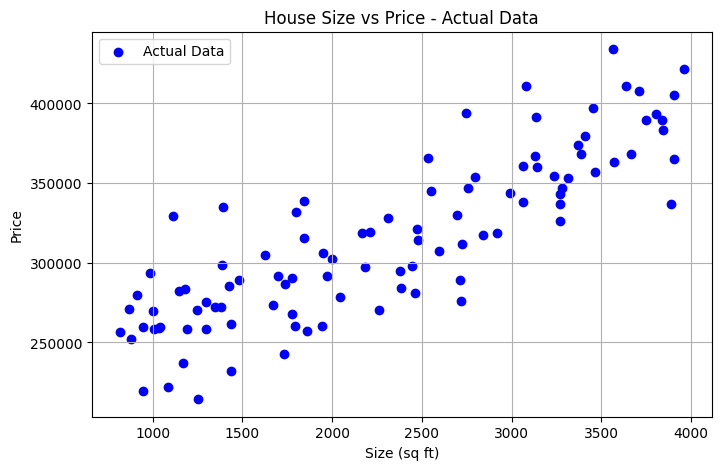

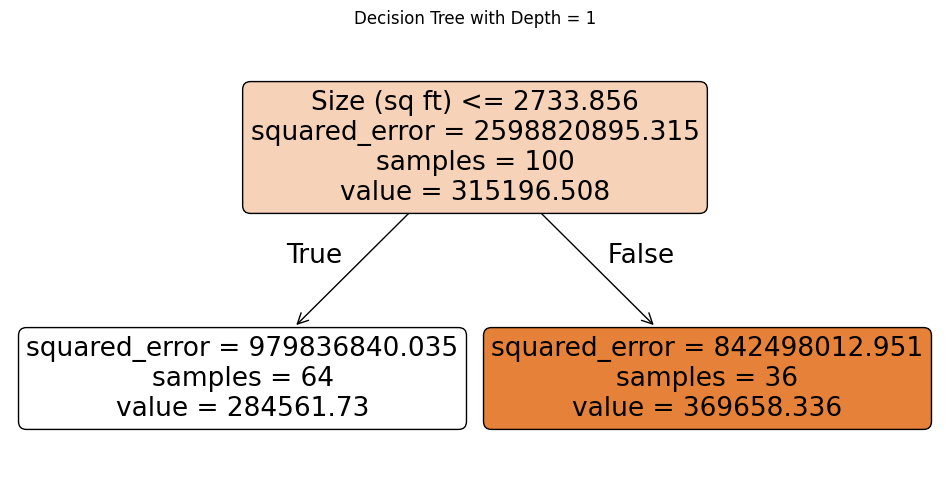

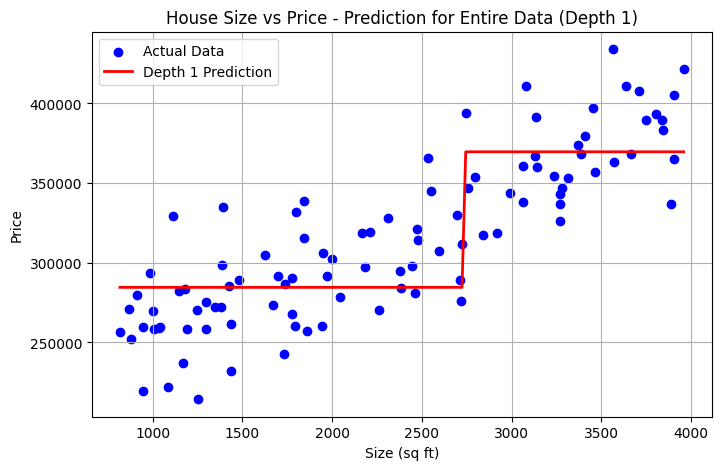

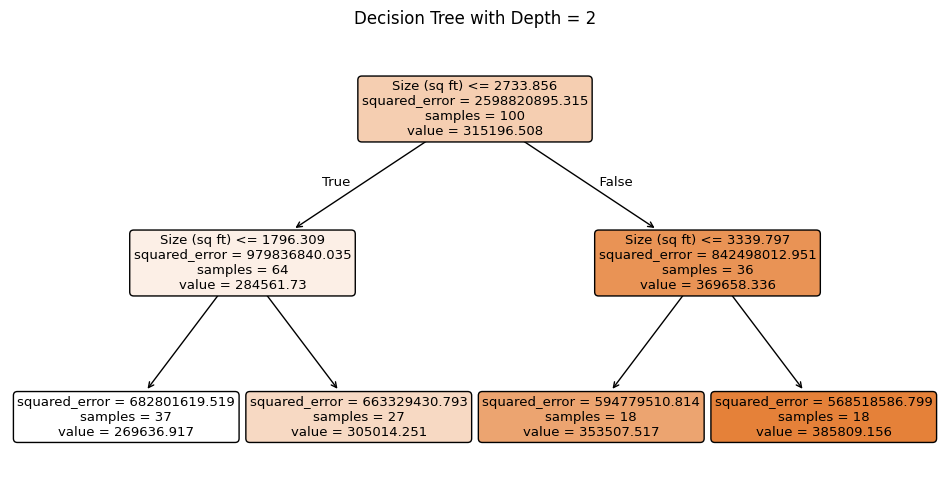

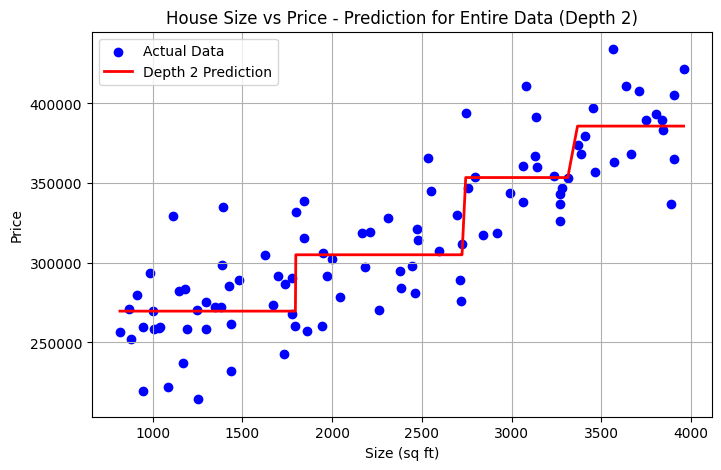

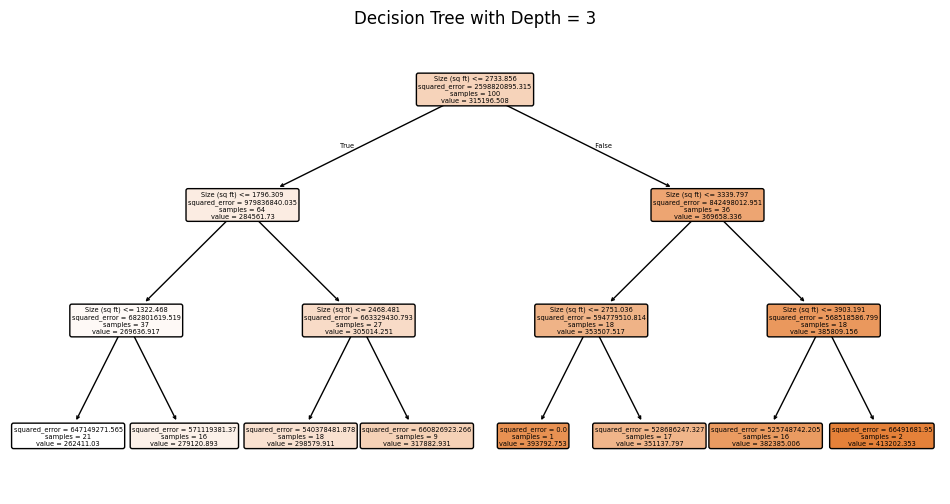

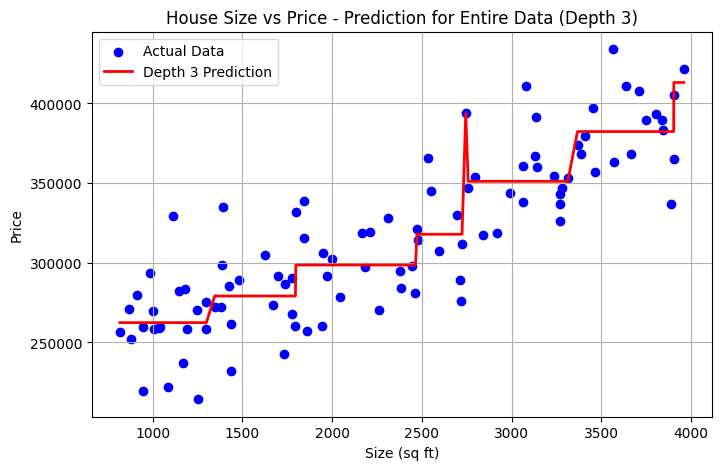

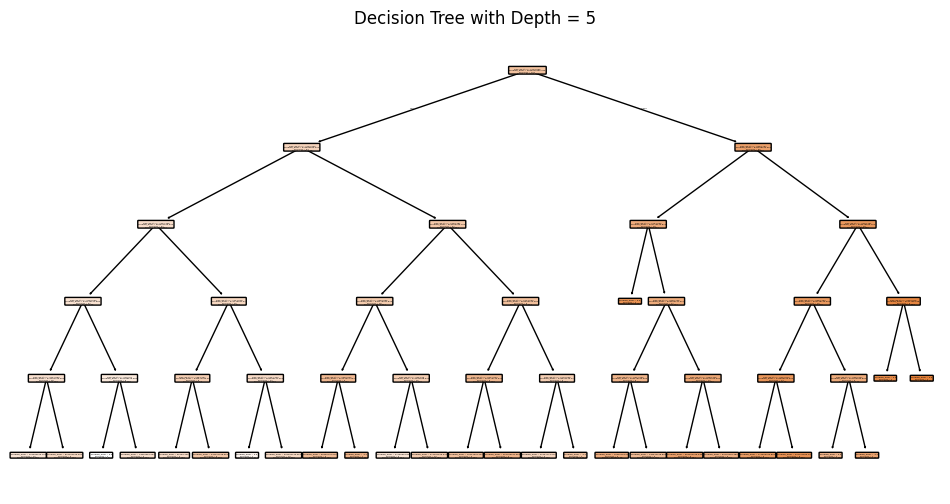

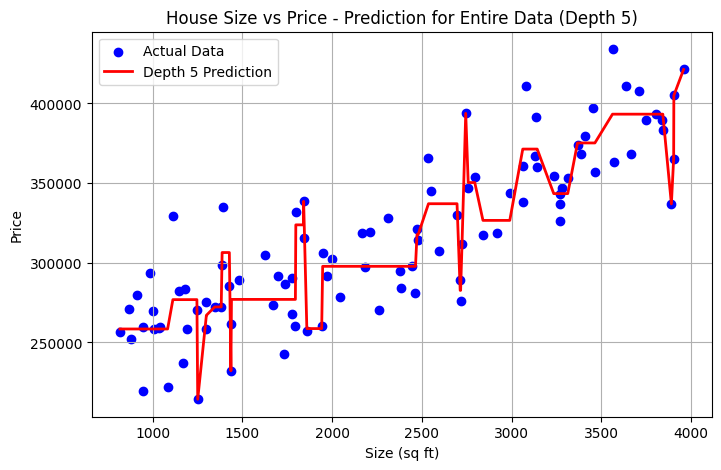

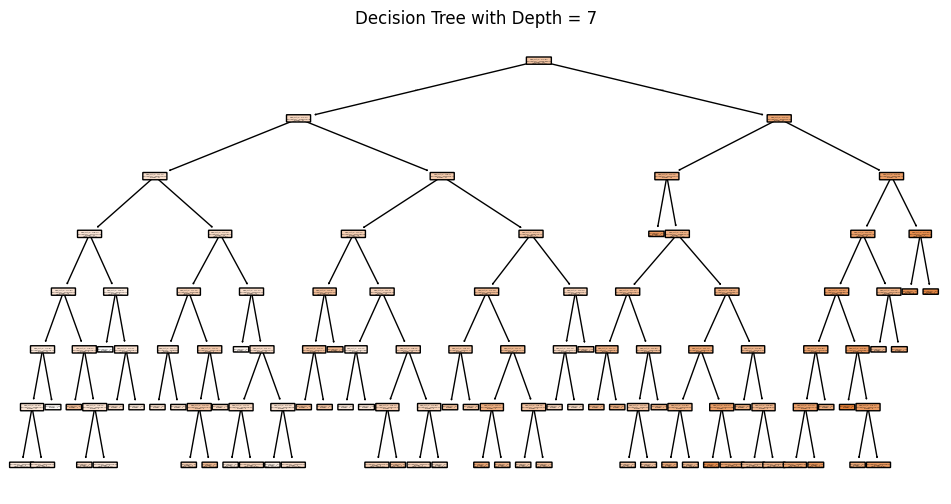

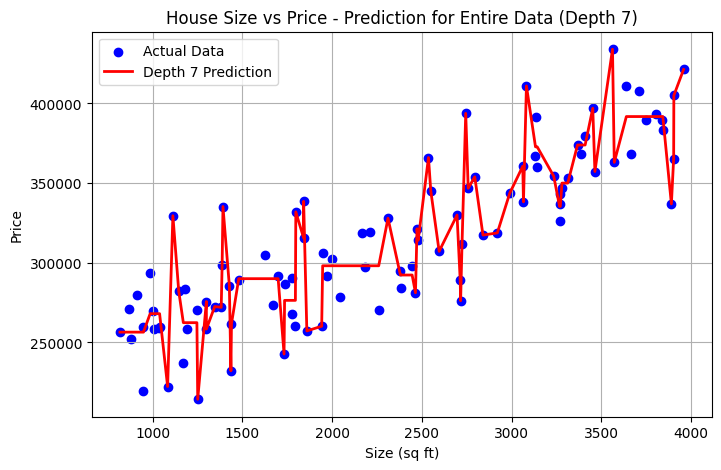

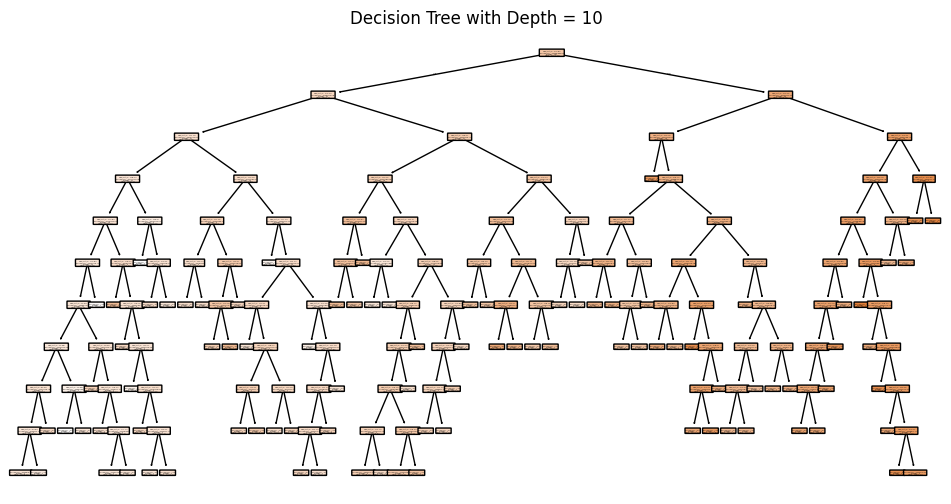

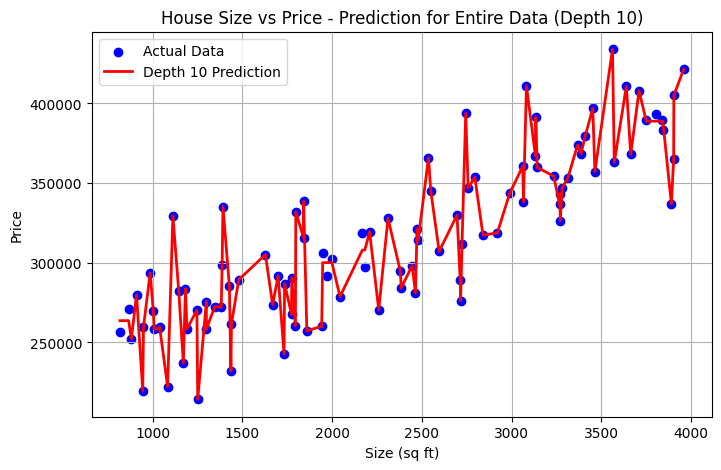

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

# Predicting house prices based on size (x1)
np.random.seed(42)
n = 100  # 100 data points

x1 = np.random.uniform(800, 4000, n)  # House size in sq. ft.

# Hypothetical true formula
price = 200000 + 50 * x1 + np.random.normal(0, 30000, n)  # Target variable: House price

# Create DataFrame
df = pd.DataFrame({'Size (sq ft)': x1, 'Price': price})

# Sort the data by Size (x1)
df_sorted = df.sort_values('Size (sq ft)')

# a simple try
threshold = 2500
low_mean = df_sorted[df_sorted['Size (sq ft)'] <= threshold]['Price'].mean()
high_mean = df_sorted[df_sorted['Size (sq ft)'] > threshold]['Price'].mean()
print(low_mean, high_mean)

# a more complex try
threshold_1 = 1000
threshold_2 = 2000
threshold_3 = 3000
mean_0 = df_sorted[df_sorted['Size (sq ft)'] <= threshold_1]['Price'].mean()
mean_1 = df_sorted[(df_sorted['Size (sq ft)'] > threshold_1) & (df_sorted['Size (sq ft)'] <= threshold_2)]['Price'].mean()
mean_2 = df_sorted[(df_sorted['Size (sq ft)'] > threshold_2) & (df_sorted['Size (sq ft)'] <= threshold_3)]['Price'].mean()
mean_3 = df_sorted[(df_sorted['Size (sq ft)'] > threshold_3)]['Price'].mean()
print(mean_0, mean_1, mean_2, mean_3)

# Extract features and target
X = df_sorted[['Size (sq ft)']]
y = df_sorted['Price']

# 2. Show Size vs Price chart for the entire dataset
plt.figure(figsize=(8, 5))
plt.scatter(X['Size (sq ft)'], y, color='blue', label='Actual Data')
plt.title('House Size vs Price - Actual Data')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 3. Function to train and plot trees with different depths
def plot_tree_with_depth(depth):
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X, y)

    # Plot tree
    plt.figure(figsize=(12, 6))
    plot_tree(tree_model, feature_names=['Size (sq ft)'], filled=True, rounded=True)
    plt.title(f"Decision Tree with Depth = {depth}")
    plt.show()

    return tree_model

# 4. Plot Trees with different depths: 1, 2, 3
for depth in [1, 2, 3, 5, 7, 10]:
    model = plot_tree_with_depth(depth)

    # Predict price for the entire dataset using the tree model
    y_pred = model.predict(X)

    # Show prediction on the Size vs Price chart for the entire dataset
    plt.figure(figsize=(8, 5))
    plt.scatter(X['Size (sq ft)'], y, color='blue', label='Actual Data')
    plt.plot(X['Size (sq ft)'], y_pred, label=f'Depth {depth} Prediction', color='red', linewidth=2)
    plt.title(f'House Size vs Price - Prediction for Entire Data (Depth {depth})')
    plt.xlabel('Size (sq ft)')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

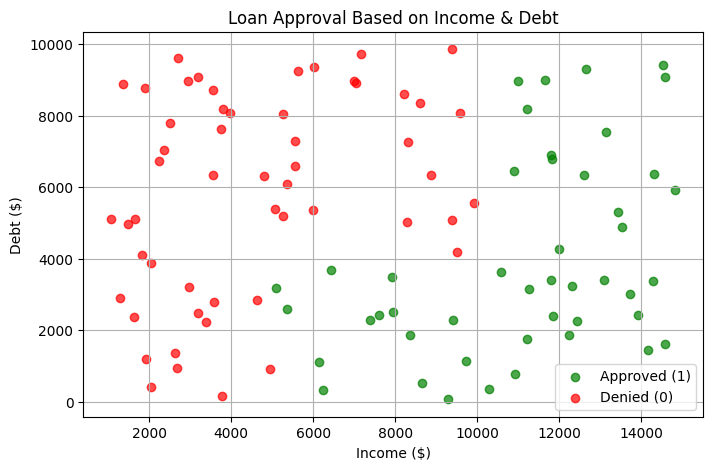

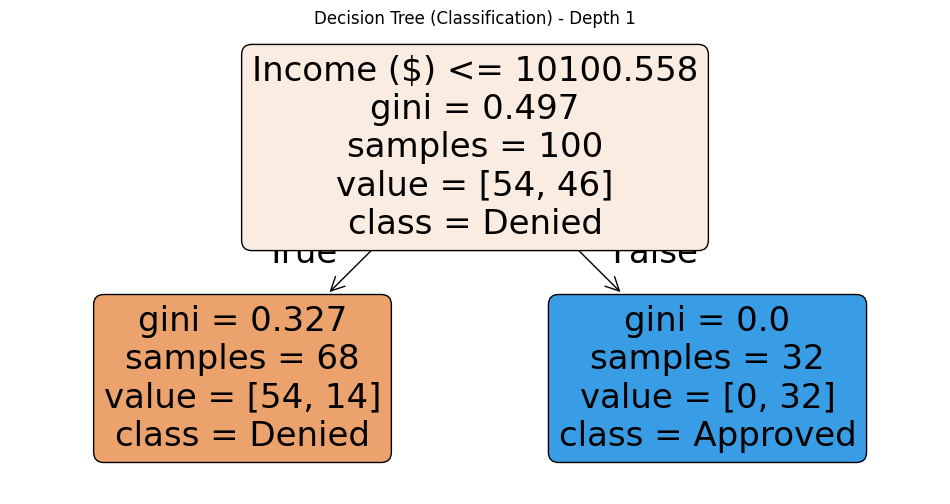

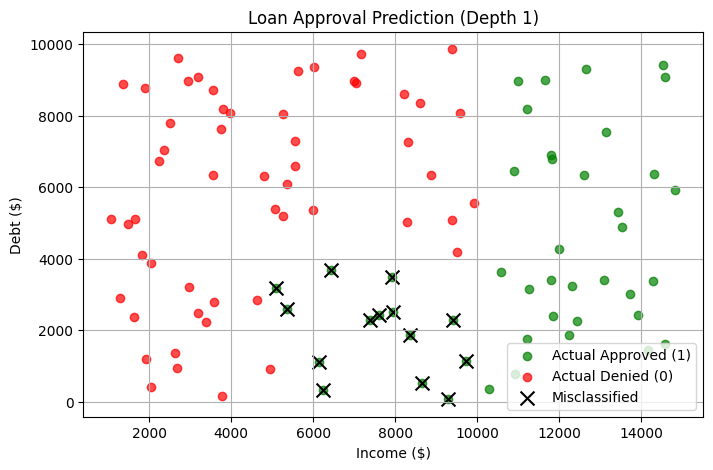

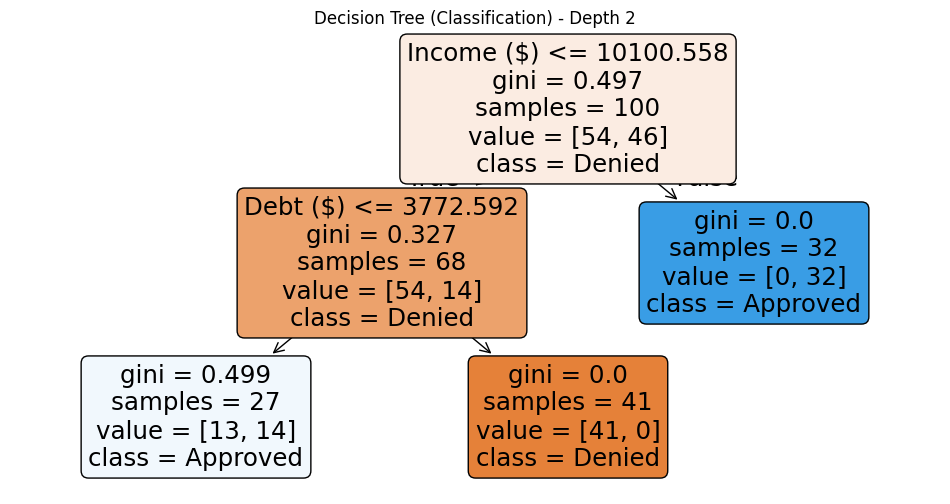

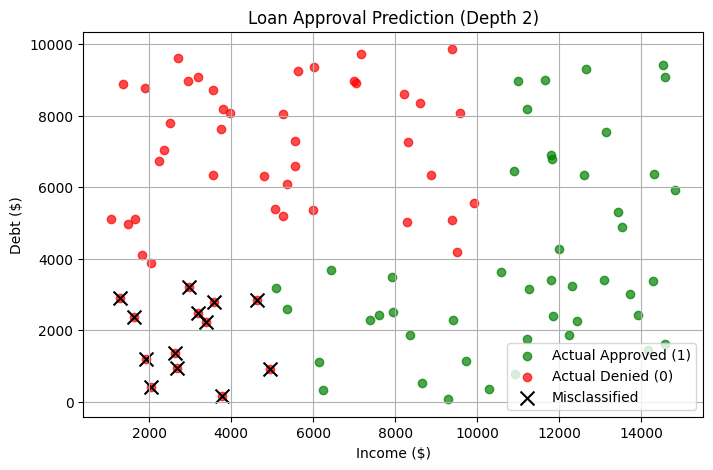

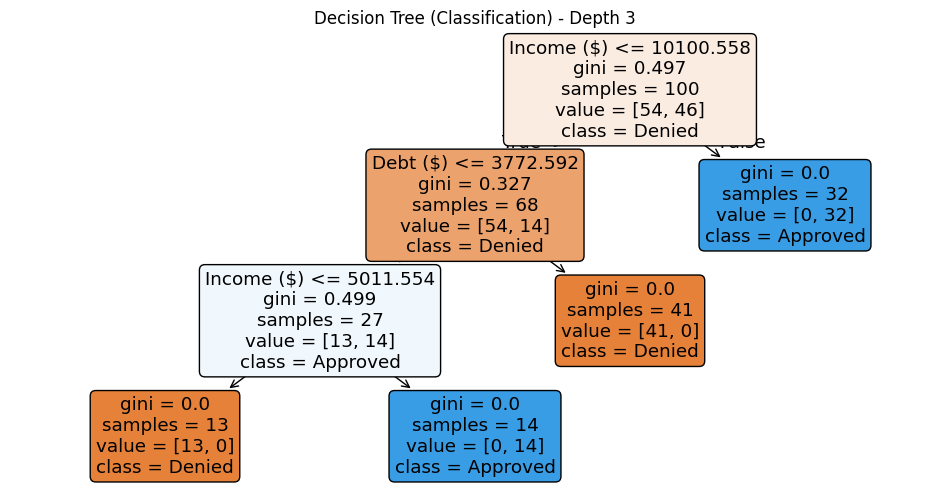

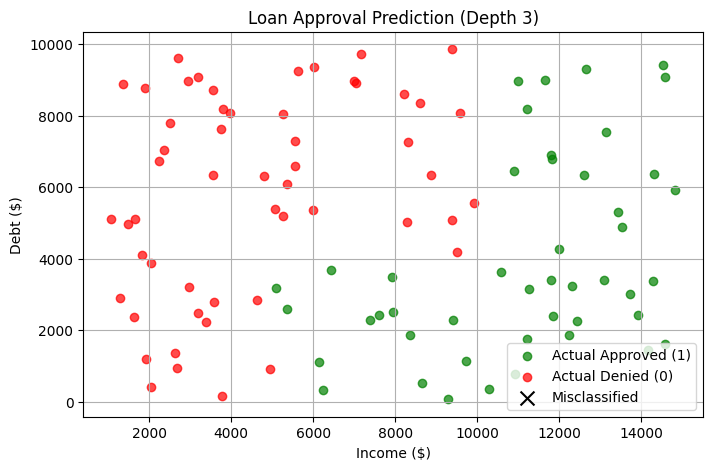

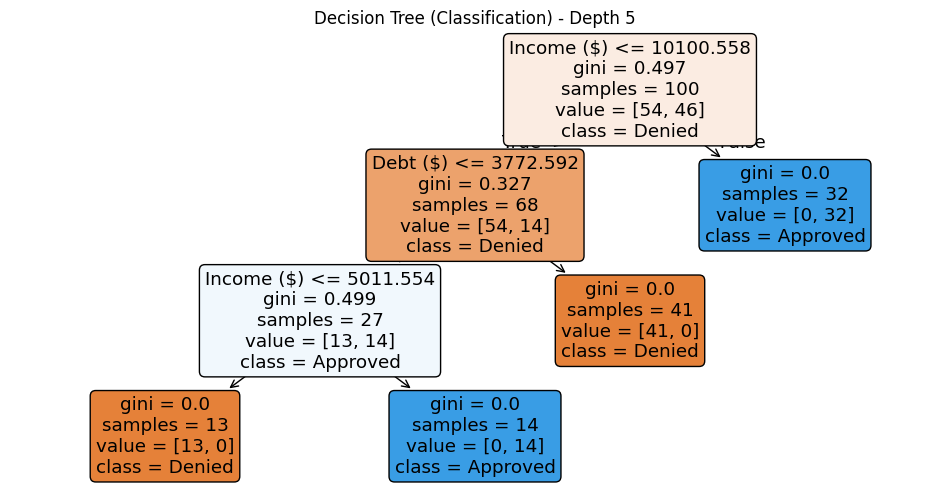

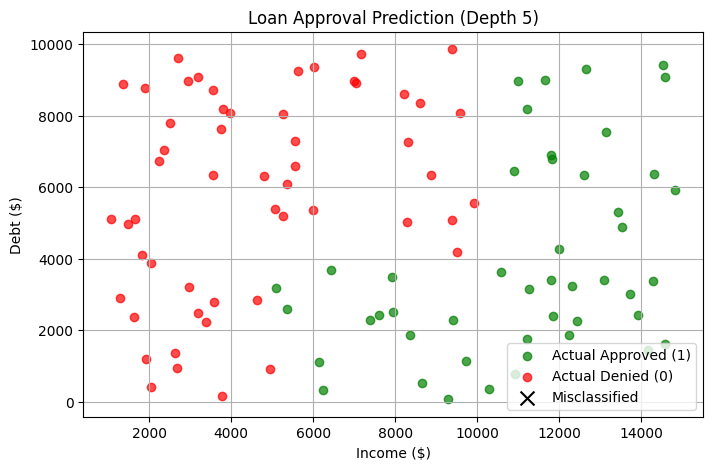

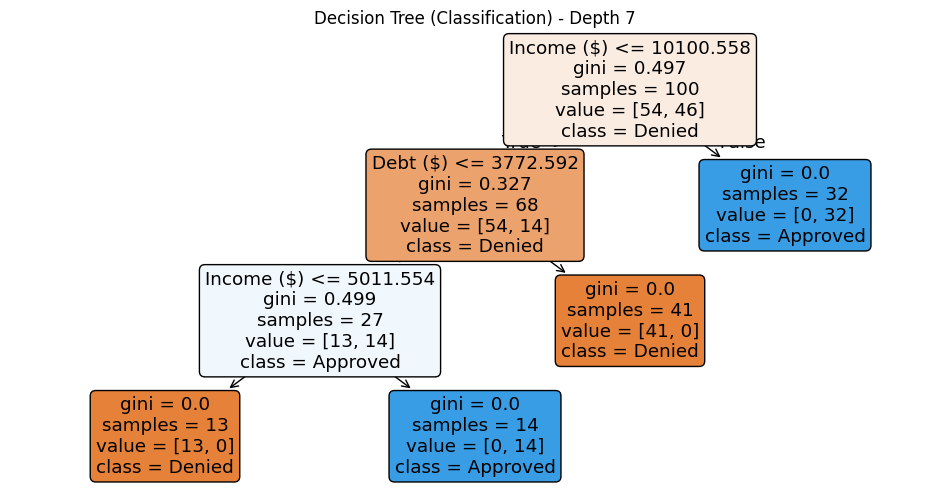

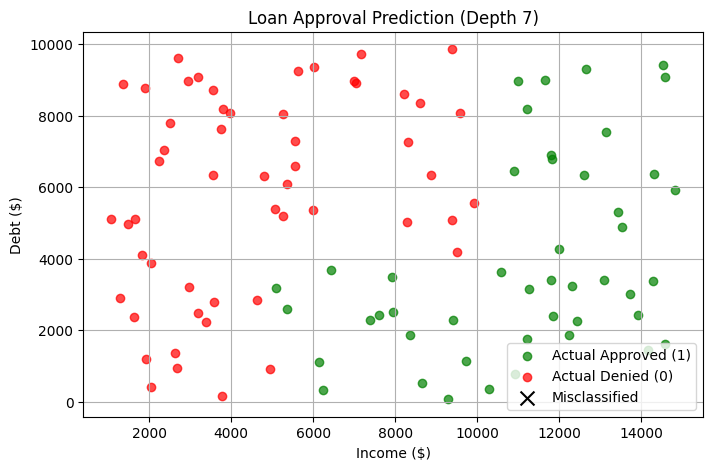

In [2]:
# Step 1: Create Loan Approval Dataset
np.random.seed(42)
n = 100  # 100 people

income = np.random.uniform(1000, 15000, n)  # Monthly income ($)
debt = np.random.uniform(0, 10000, n)  # Monthly debt ($)

# Loan approval logic: Higher income, lower debt → More likely to be approved
approval = ((income > 5000) & (debt < 4000)) | (income > 10000)
approval = approval.astype(int)  # Convert boolean to 0 (Denied) / 1 (Approved)

# Create DataFrame
df = pd.DataFrame({'Income ($)': income, 'Debt ($)': debt, 'Approved': approval})

# Step 2: Visualize Income vs Debt with Approval Status
plt.figure(figsize=(8, 5))
plt.scatter(df[df['Approved'] == 1]['Income ($)'], df[df['Approved'] == 1]['Debt ($)'], 
            color='green', label='Approved (1)', alpha=0.7)
plt.scatter(df[df['Approved'] == 0]['Income ($)'], df[df['Approved'] == 0]['Debt ($)'], 
            color='red', label='Denied (0)', alpha=0.7)
plt.title('Loan Approval Based on Income & Debt')
plt.xlabel('Income ($)')
plt.ylabel('Debt ($)')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Train Decision Trees with Different Depths
X = df[['Income ($)', 'Debt ($)']]
y = df['Approved']

def plot_tree_with_depth(depth):
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_model.fit(X, y)

    # Plot decision tree
    plt.figure(figsize=(12, 6))
    plot_tree(tree_model, feature_names=['Income ($)', 'Debt ($)'], class_names=['Denied', 'Approved'], 
              filled=True, rounded=True)
    plt.title(f"Decision Tree (Classification) - Depth {depth}")
    plt.show()

    return tree_model

# Step 4: Train trees at different depths and visualize
for depth in [1, 2, 3, 5, 7]:
    model = plot_tree_with_depth(depth)

    # Predict over the entire dataset
    y_pred = model.predict(X)

    # Plot predictions on Income vs Debt chart
    plt.figure(figsize=(8, 5))
    plt.scatter(df[df['Approved'] == 1]['Income ($)'], df[df['Approved'] == 1]['Debt ($)'], 
                color='green', label='Actual Approved (1)', alpha=0.7)
    plt.scatter(df[df['Approved'] == 0]['Income ($)'], df[df['Approved'] == 0]['Debt ($)'], 
                color='red', label='Actual Denied (0)', alpha=0.7)

    # Highlight wrong predictions
    mismatches = (y != y_pred)
    plt.scatter(df[mismatches]['Income ($)'], df[mismatches]['Debt ($)'], 
                color='black', marker='x', label='Misclassified', s=100)

    plt.title(f'Loan Approval Prediction (Depth {depth})')
    plt.xlabel('Income ($)')
    plt.ylabel('Debt ($)')
    plt.legend()
    plt.grid(True)
    plt.show()